In [45]:
import os
import pandas as pd
import networkx as nx

from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [16]:
root = "data\\stanford"
files = os.listdir(root)
files_path = [os.path.join(root, file) for file in files]
files_path

['data\\stanford\\._mooc_actions.tsv',
 'data\\stanford\\._mooc_action_features.tsv',
 'data\\stanford\\mooc_actions.tsv',
 'data\\stanford\\mooc_action_features.tsv',
 'data\\stanford\\mooc_action_labels.tsv']

In [17]:
for path in files_path:
    display(pd.read_csv(path, sep='\t', encoding='windows-1252').head())

,Unnamed: 0,Unnamed: 1


,Unnamed: 0,Unnamed: 1


,ACTIONID,USERID,TARGETID,TIMESTAMP
0,0,0,0,0.0
1,1,0,1,6.0
2,2,0,2,41.0
3,3,0,1,49.0
4,4,0,2,51.0


,ACTIONID,FEATURE0,FEATURE1,FEATURE2,FEATURE3
0,0,-0.319991,-0.435701,0.106784,-0.067309
1,1,-0.319991,-0.435701,0.106784,-0.067309
2,2,-0.319991,-0.435701,0.106784,-0.067309
3,3,-0.319991,-0.435701,0.106784,-0.067309
4,4,-0.319991,-0.435701,0.106784,-0.067309


,ACTIONID,LABEL
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [18]:
actions = pd.read_csv("data\\stanford\\mooc_actions.tsv", sep='\t', encoding='windows-1252') 
features = pd.read_csv("data\\stanford\\mooc_action_features.tsv", sep='\t', encoding='windows-1252') 
labels = pd.read_csv("data\\stanford\\mooc_action_labels.tsv", sep='\t', encoding='windows-1252')

In [19]:
actions.head()

,ACTIONID,USERID,TARGETID,TIMESTAMP
0,0,0,0,0.0
1,1,0,1,6.0
2,2,0,2,41.0
3,3,0,1,49.0
4,4,0,2,51.0


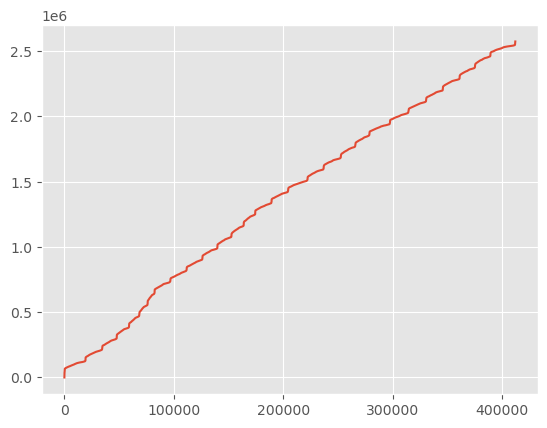

In [20]:
actions['TIMESTAMP'].plot()
plt.show()

In [21]:
features.head()

,ACTIONID,FEATURE0,FEATURE1,FEATURE2,FEATURE3
0,0,-0.319991,-0.435701,0.106784,-0.067309
1,1,-0.319991,-0.435701,0.106784,-0.067309
2,2,-0.319991,-0.435701,0.106784,-0.067309
3,3,-0.319991,-0.435701,0.106784,-0.067309
4,4,-0.319991,-0.435701,0.106784,-0.067309


In [22]:
merged_table = pd.merge(actions, features, on="ACTIONID")
merged_table = pd.merge(merged_table, labels, on="ACTIONID")

In [23]:
merged_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411749 entries, 0 to 411748
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ACTIONID   411749 non-null  int64  
 1   USERID     411749 non-null  int64  
 2   TARGETID   411749 non-null  int64  
 3   TIMESTAMP  411749 non-null  float64
 4   FEATURE0   411749 non-null  float64
 5   FEATURE1   411749 non-null  float64
 6   FEATURE2   411749 non-null  float64
 7   FEATURE3   411749 non-null  float64
 8   LABEL      411749 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 28.3 MB


In [24]:
merged_table.head()

,ACTIONID,USERID,TARGETID,TIMESTAMP,FEATURE0,FEATURE1,FEATURE2,FEATURE3,LABEL
0,0,0,0,0.0,-0.319991,-0.435701,0.106784,-0.067309,0
1,1,0,1,6.0,-0.319991,-0.435701,0.106784,-0.067309,0
2,2,0,2,41.0,-0.319991,-0.435701,0.106784,-0.067309,0
3,3,0,1,49.0,-0.319991,-0.435701,0.106784,-0.067309,0
4,4,0,2,51.0,-0.319991,-0.435701,0.106784,-0.067309,0


## Label
- which represent if student drops-out after the action

<Axes: xlabel='LABEL'>

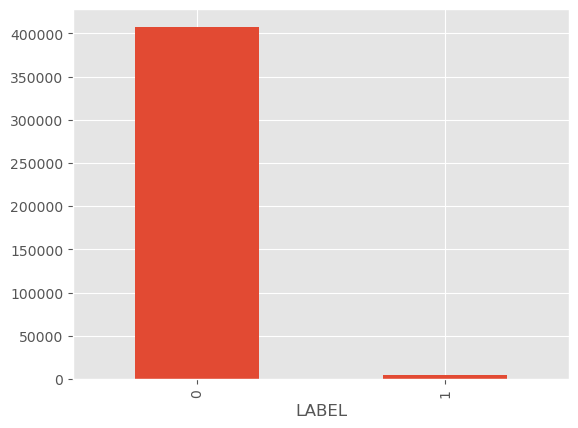

In [25]:
lable_dist = merged_table['LABEL'].value_counts()
lable_dist.plot(kind='bar')

## USERID

In [35]:
number_of_user = merged_table['USERID'].nunique()
number_of_action = merged_table.__len__()
"action per user : ", number_of_action/number_of_user

('action per user : ', 58.428976869589896)

In [27]:
merged_table['TARGETID'].nunique()

97

<Axes: xlabel='TARGETID'>

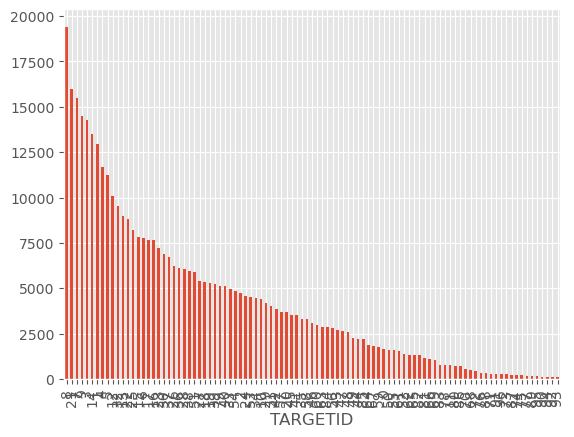

In [28]:
course_dist = merged_table['TARGETID'].value_counts()
course_dist.plot(kind='bar')

### first impresion action per user
- so we have around 58.4 action per user

## TARGETID

In [32]:
number_of_target = merged_table.TARGETID.nunique()

In [37]:
number_of_action / number_of_target

4244.835051546392

### first impresion on targetid
- have good number of action made on it around ${4244}$

### Explor Action Features 

In [48]:
features_correlation_matrix = features.drop("ACTIONID", axis=1).corr()
features_correlation_matrix

,FEATURE0,FEATURE1,FEATURE2,FEATURE3
FEATURE0,1.000000,-0.139421,-0.126153,0.118975
FEATURE1,-0.139421,1.000000,-0.171770,-0.025300
FEATURE2,-0.126153,-0.171770,1.000000,0.040886
FEATURE3,0.118975,-0.025300,0.040886,1.000000


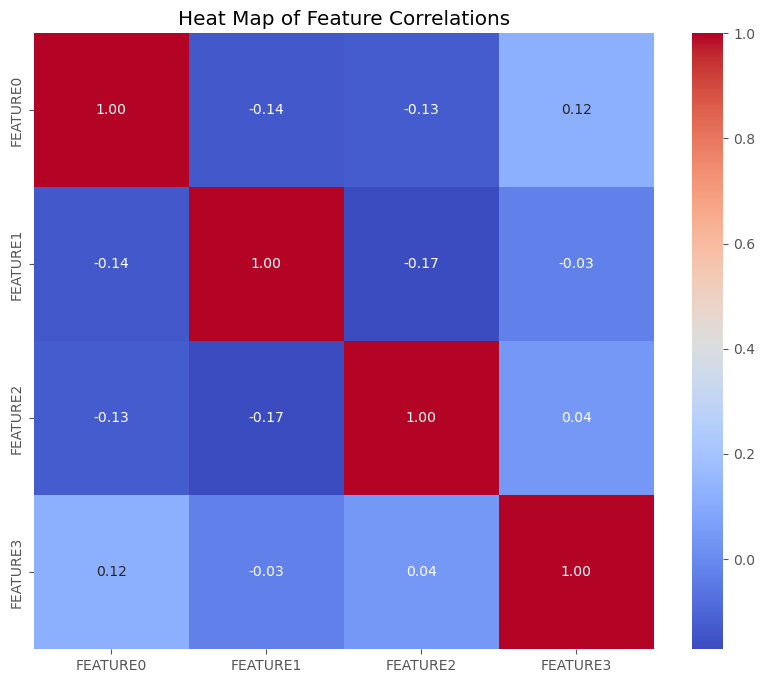

In [49]:
plt.figure(figsize=(10, 8))
sns.heatmap(features_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heat Map of Feature Correlations')
plt.show()

In [42]:
features_null_dist = features.drop("ACTIONID", axis=1).isna().mean()

In [44]:
features_null_dist

FEATURE0    0.0
FEATURE1    0.0
FEATURE2    0.0
FEATURE3    0.0
dtype: float64

### first impresion on Action Features 
- they have have low correlation which **"may"** mean:
    - each one of them have diffrent meaning or represent totaly diffrent things
- there is no null which is good